# Riemannian Robust M-estimator

Lead author: Jihyun Ryu

This notebook shows how to compute location parameter from the data based on the concept of M-estimators. 
By taking advantage of the robustness property of several M-estimators in the Euclidean space, we will see that location parameter from the samples on a certain Riemannian manifold is properly computed in the case when data contaminated with a small amount of outliers on the same Riemannian manifold.

In [1]:
import os
os.environ["GEOMSTATS_BACKEND"] = "autograd"
import geomstats.backend as gs
gs.has_autodiff()

True

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

In [20]:
from riemannian_robust_m_estimator import RiemannianRobustMean
from geomstats.learning.frechet_mean import FrechetMean

## On the sphere(dim = 2)

## Generate data on the sphere with 10% outlier

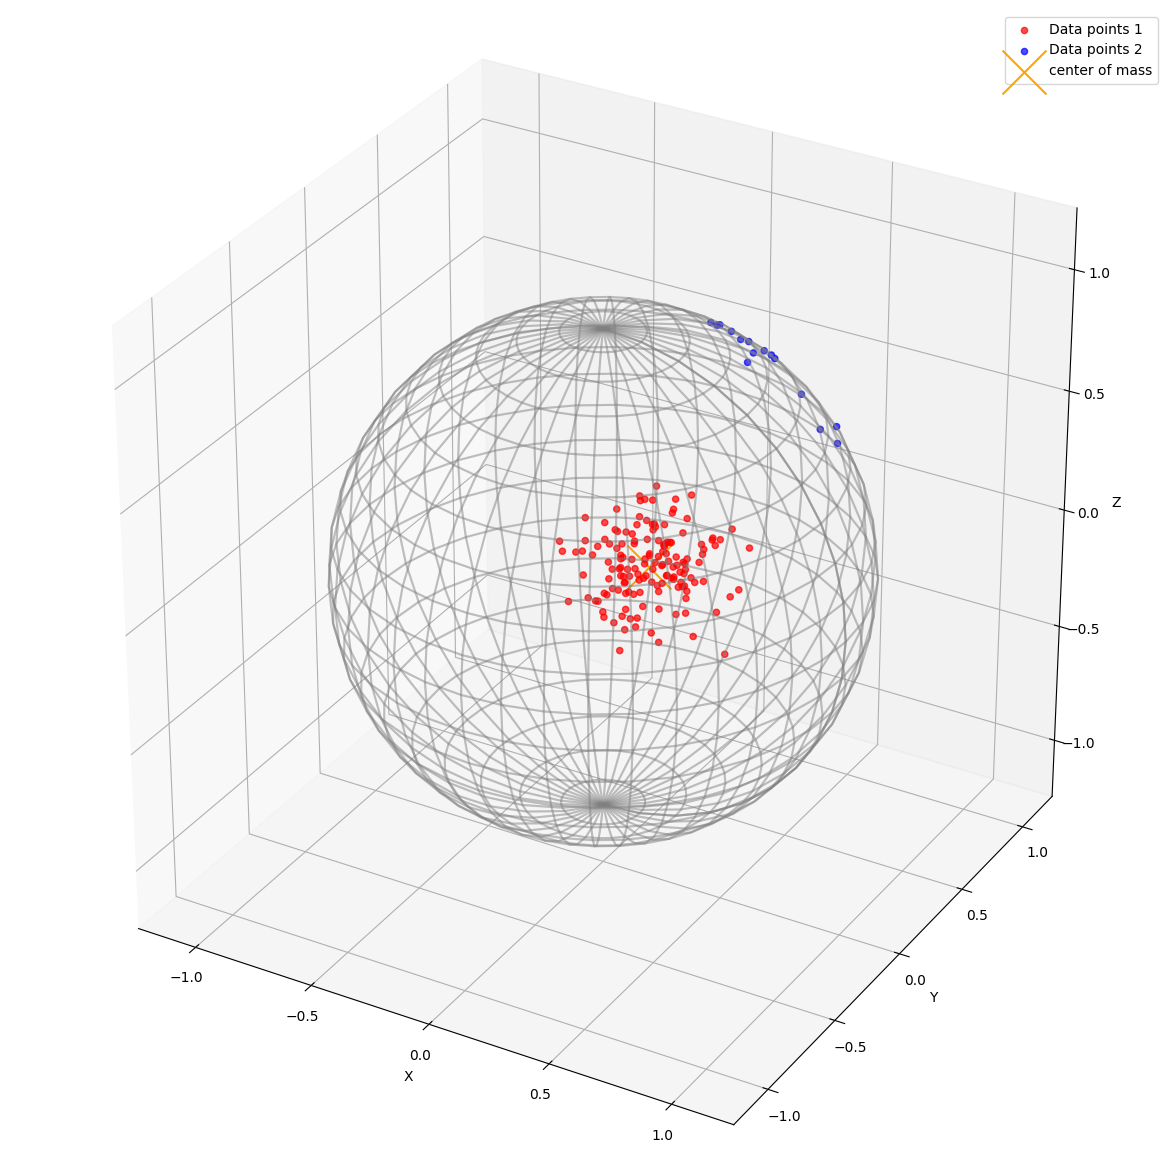

In [111]:
sphere = Hypersphere(dim=2)
n_samples = 150
outlier_ratio = 0.1
n_outliers = int(n_samples*outlier_ratio)

mu = gs.array([0.5, -0.5, 0.0])
mu = mu / gs.linalg.norm(mu)
cluster = sphere.random_von_mises_fisher(kappa=50, n_samples=n_samples, mu=mu)

SO3 = SpecialOrthogonal(3, equip=False)
rotation1 = SO3.random_uniform()
rotation2 = SO3.random_uniform()

cluster_1 = cluster @ rotation1
cluster_2 = cluster @ rotation2
cluster_2 = cluster_2[:n_outliers]
samples = gs.vstack((cluster_1,cluster_2))

fig = plt.figure(figsize=(15, 15))
ax = visualization.plot(
    cluster_1, space="S2", color="red", alpha=0.7, label="Data points 1 "
)
ax = visualization.plot(
    cluster_2, space="S2", ax=ax, color="blue", alpha=0.7, label="Data points 2"
)
ax = visualization.plot(
    mu @ rotation1, space="S2", ax=ax, color="orange", alpha=1, s=1000, marker='x', label="center of mass"
)
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend();

In [112]:
print('center of mass:',mu @ rotation1)

center of mass: [-0.2787824   0.83378625 -0.47653002]


## select a robust M-estimator 
* huber_loss
* pseudo_huber_loss
* fair_loss
* cauchy_loss
* biweight_loss
* welsch_loss
* hampel_loss
* correntropy_loss
* logistic_loss
* lorentzian_loss

  
[reference] [CCE2021] D.Q.F. de Menezes et al. A review on robust m-estimators for regression analysis. https://doi.org/10.1016/j.compchemeng.2021.107254

The rho functions of some representative robust m-estimators above are predefined and provided in the code. You can compute location parameter based on the samples on the manifold by choosing the proper rho function style.

## Compute location parameter of M-estimator
### 1. Baseline(Frechet mean)

In [113]:
mean = FrechetMean(sphere)
mean.fit(samples)
mean_estimate = mean.estimate_
print(mean_estimate)

[-0.2331892   0.89681557 -0.37595828]


### 2. Huber Loss
[reference] (2024) Jongmin Lee, Sungkyu Jung. Huber means on Riemannian manifolds, https://doi.org/10.48550/arXiv.2407.15764

In [114]:
# Autograd + huber
huber_auto = RiemannianRobustMean(sphere, 0.7, m_estimator='huber', method='autograd',init_point_method='first')
huber_auto.set(max_iter=512)
huber_auto.fit(samples)
print(huber_auto.estimate_.x)

None
False
None
[-0.25093185  0.87399962 -0.41612241]


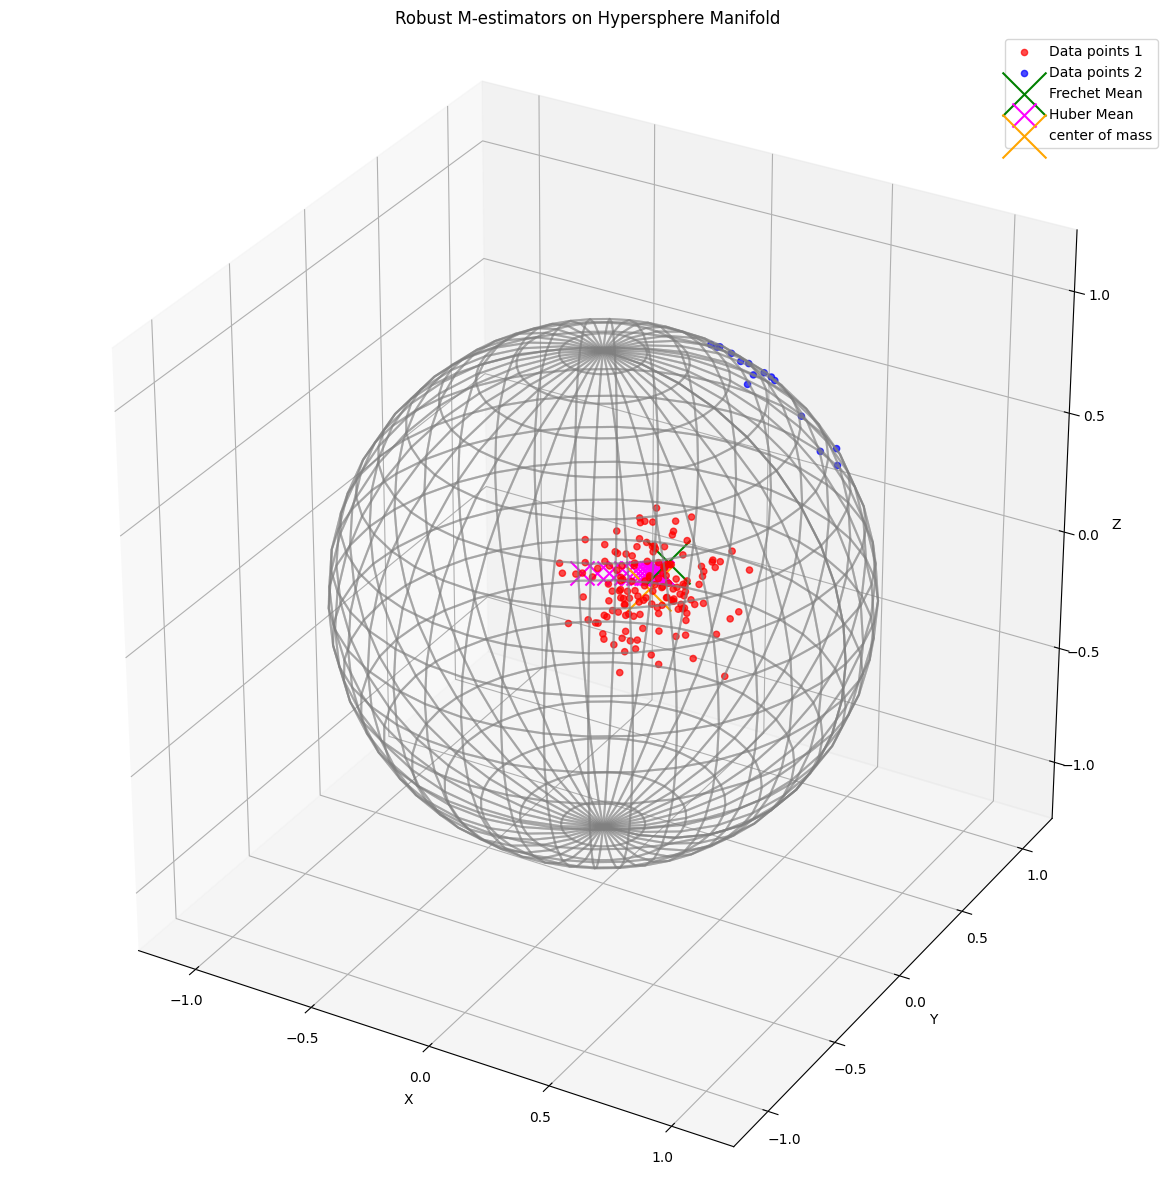

In [117]:
fig = plt.figure(figsize=(15, 15))
colors = ["red", "blue"]

ax = visualization.plot(
    cluster_1, space="S2", color="red", alpha=0.7, label="Data points 1 "
)
ax = visualization.plot(
    cluster_2, space="S2", ax=ax, color="blue", alpha=0.7, label="Data points 2"
)

ax = visualization.plot(
    mean_estimate, space="S2", ax=ax, color="green", alpha=1, s=1000, marker='x', label="Frechet Mean"
)
for i,c in enumerate(huber_auto.estimate_.bases):
    if i==0:
        ax = visualization.plot(c, ax=ax, space="S2", marker="x", s=300, color='magenta',label='Huber Mean')
    else:
        ax.scatter(*c, marker="x", s=300, color='magenta')
ax = visualization.plot(
    mu @ rotation1, space="S2", ax=ax, color="orange", alpha=1, s=1000, marker='x', label="center of mass"
)
ax.set_title("Robust M-estimators on Hypersphere Manifold")
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend();

### 3. fair loss

In [118]:
# Autograd + fair
fair_auto = RiemannianRobustMean(sphere, 3, m_estimator='fair', method='autograd')
fair_auto.set(max_iter=512)
fair_auto.fit(samples)
print(fair_auto.estimate_.x)

None
False
None
[-0.24197263  0.8855707  -0.39650194]


### 4. Hampel loss

In [119]:
# Autograd + Hampel
Hampel_auto = RiemannianRobustMean(sphere, 2, m_estimator='Hampel', method='autograd')
Hampel_auto.set(max_iter=512)
Hampel_auto.fit(samples)
print(Hampel_auto.estimate_.x)

None
False
None
[-0.23241865  0.89685998 -0.3763293 ]


### 5. Tukey's biweight loss

In [120]:
# Autograd + biweight
biweight_auto = RiemannianRobustMean(sphere, 4.7, m_estimator='biweight', method='autograd')
biweight_auto.set(max_iter=512)
biweight_auto.fit(samples)
print(biweight_auto.estimate_.x)

None
False
None
[-0.23762591  0.89072373 -0.38748569]


### 6. correntropy loss

In [121]:
# Autograd + correntropy
correntropy_auto = RiemannianRobustMean(sphere, 2.12, m_estimator='correntropy', method='autograd')
correntropy_auto.set(max_iter=512)
correntropy_auto.fit(samples)
print(correntropy_auto.estimate_.x)

None
False
None
[-0.27876468  0.87471145 -0.39644688]


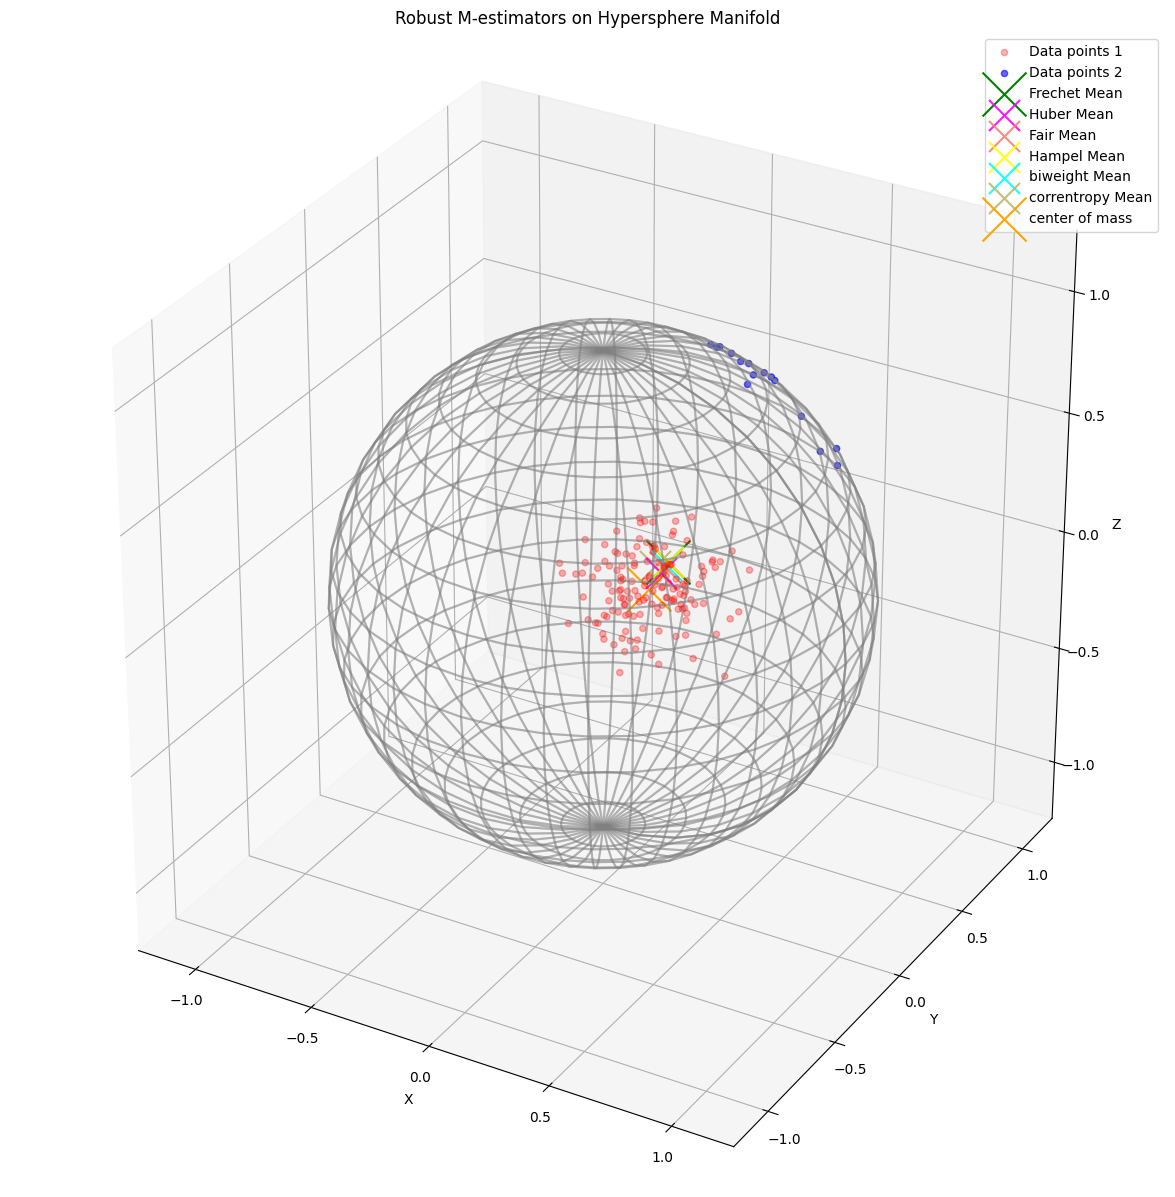

In [124]:
fig = plt.figure(figsize=(15, 15))
colors = ["red", "blue"]

ax = visualization.plot(
    cluster_1, space="S2", color="red", alpha=0.3, label="Data points 1 "
)
ax = visualization.plot(
    cluster_2, space="S2", ax=ax, color="blue", alpha=0.6, label="Data points 2"
)

ax = visualization.plot(mean_estimate, ax=ax, space="S2", marker="x", s=1000, color='green',label='Frechet Mean')
ax.scatter(*huber_auto.estimate_.x,  marker="x", alpha=0.9, s=500, color='magenta',label='Huber Mean')
ax.scatter(*fair_auto.estimate_.x, marker="x", alpha=0.9, s=500, color='#FA8072',label='Fair Mean')
ax.scatter(*Hampel_auto.estimate_.x,  marker="x", alpha=0.9, s=500, color='yellow',label='Hampel Mean')
ax.scatter(*biweight_auto.estimate_.x, marker="x", alpha=0.9, s=500, color='cyan',label='biweight Mean')
ax.scatter(*correntropy_auto.estimate_.x, marker="x", alpha=0.9, s=500, color='#BDB76B',label='correntropy Mean')

ax = visualization.plot(
    mu @ rotation1, space="S2", ax=ax, color="orange", alpha=1, s=1000, marker='x', label="center of mass"
)
ax.set_title("Robust M-estimators on Hypersphere Manifold")
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend();

### In "autograd/pytorch" backend setting, you can give customized rho function of M-estimator by which you can compute location parameter. 
### Because we now deal with the data on the Riemannian manifold, the customized rho function must have the 3 inputs, "space(manifold), points(samples), base(base point needed for tangent space)".
### In order for a rho function have robustness property, this type of customized rho function should have critical value, which plays a role of threshold that diminishs the effect of outliers, needed to be set as input "critical_value".

## Custom Loss Template(Required):

In [ ]:
def custom_loss(space, points, base, critical_value=None, weights=None):
    # returns loss (scalar) OR loss, gradient

- **Required arguments**: `space`, `points`, `base`
- **Optional**: `critical_value`, `weights`
- If `weights` is used, must satisfy `len(weights) == len(points)`

### Example:

In [ ]:
def basic1_loss(space,points,base,weights=None):
    n = len(points)
    if weights is None:
        weights = gs.ones(n)
    distances = space.metric.squared_dist(points, base)
    return gs.sum(weights * distances) / gs.sum(weights)

robust_mean = RiemannianRobustMean(space, c_value, method='autograd')
robust_mean._set_loss(fun=basic1_loss)
robust_mean.fit(points)